In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

from pyclustering.utils.metric import distance_metric, type_metric

from yellowbrick.cluster import KElbowVisualizer

import utils
from common import *
from projection import *
from estimators import *
from experiment2 import *
from embedding import *
from scoring import *
import stroke

plt.rcParams.update({'font.size': 16})

from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [2]:
os_df_X, os_df_y, df_X, df_y = stroke.load_dataset()
df_X = os_df_X
df_y = os_df_y
df = pd.concat([df_X, df_y], axis=1)
print(df.head())

        age  hypertension  heart_disease  ever_married       bmi   is_male  \
0  1.051434     -0.328602       4.185032      0.723884  1.044503  1.189990   
1  0.786070     -0.328602      -0.238947      0.723884  0.027170 -0.840343   
2  1.626390     -0.328602       4.185032      0.723884  0.587154  1.189990   
3  0.255342     -0.328602      -0.238947      0.723884  0.805868 -0.840343   
4  1.582163      3.043196      -0.238947      0.723884 -0.579952 -0.840343   

   is_rural_residence  work_type_Self_employed  work_type_children  \
0           -0.984080                -0.436881           -0.394112   
1            1.016178                 2.288955           -0.394112   
2            1.016178                -0.436881           -0.394112   
3           -0.984080                -0.436881           -0.394112   
4            1.016178                 2.288955           -0.394112   

   work_type_Govt_job  work_type_Never_worked  smoking_status_unknown  \
0           -0.384111               -

In [3]:
experiment = Experiment(df_X, df_y)

experiment.state[1]['svc'] = {}
experiment.state[1]['svc']['C'] = 0.001
experiment.state[1]['svc']['threshold'] = 0.03

experiment.state[1]['pca'] = {}
experiment.state[1]['pca']['n_components'] = 5

thresholds= [-0.05660232 -0.02932345 -0.00204457  0.0252343   0.05251318  0.07979205
  0.10707093  0.13434981  0.16162868  0.18890756  0.21618643  0.24346531
  0.27074418  0.29802306  0.32530193  0.35258081  0.37985968  0.40713856
  0.43441744  0.46169631  0.48897519  0.51625406  0.54353294  0.57081181
  0.59809069  0.62536956  0.65264844  0.67992731  0.70720619  0.73448507
  0.76176394  0.78904282  0.81632169  0.84360057  0.87087944  0.89815832
  0.92543719  0.95271607  0.97999494  1.00727382]
threshold=-0.05660232295438204, rloss=0.0
threshold=-0.02932344750692569, rloss=0.0
threshold=-0.0020445720594693406, rloss=0.0
threshold=0.025234303387987003, rloss=0.2407686332981592
threshold=0.05251317883544336, rloss=0.43602898760122183
threshold=0.07979205428289972, rloss=0.5648429422139171
threshold=0.10707092973035605, rloss=0.9598564939373047
threshold=0.13434980517781242, rloss=0.9598564939373047
threshold=0.16162868062526875, rloss=0.9598564939373047
threshold=0.18890755607272514, rlo

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


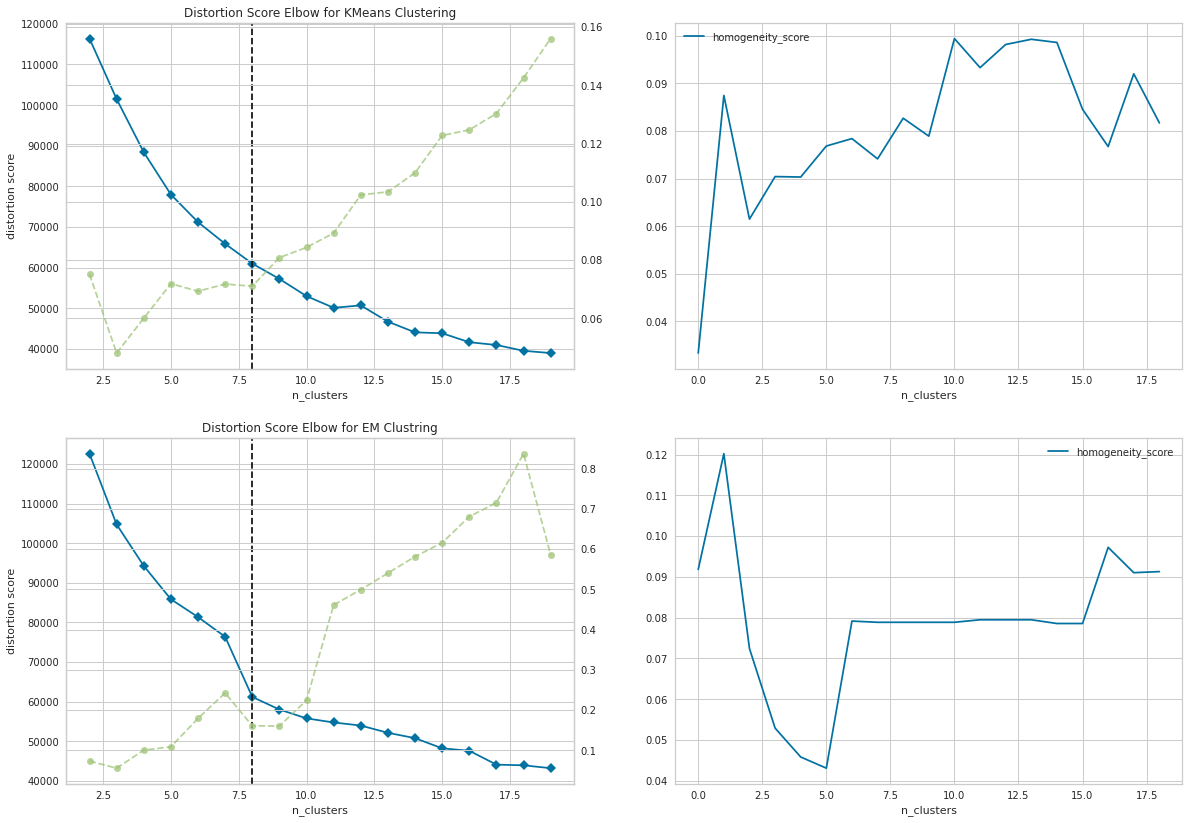

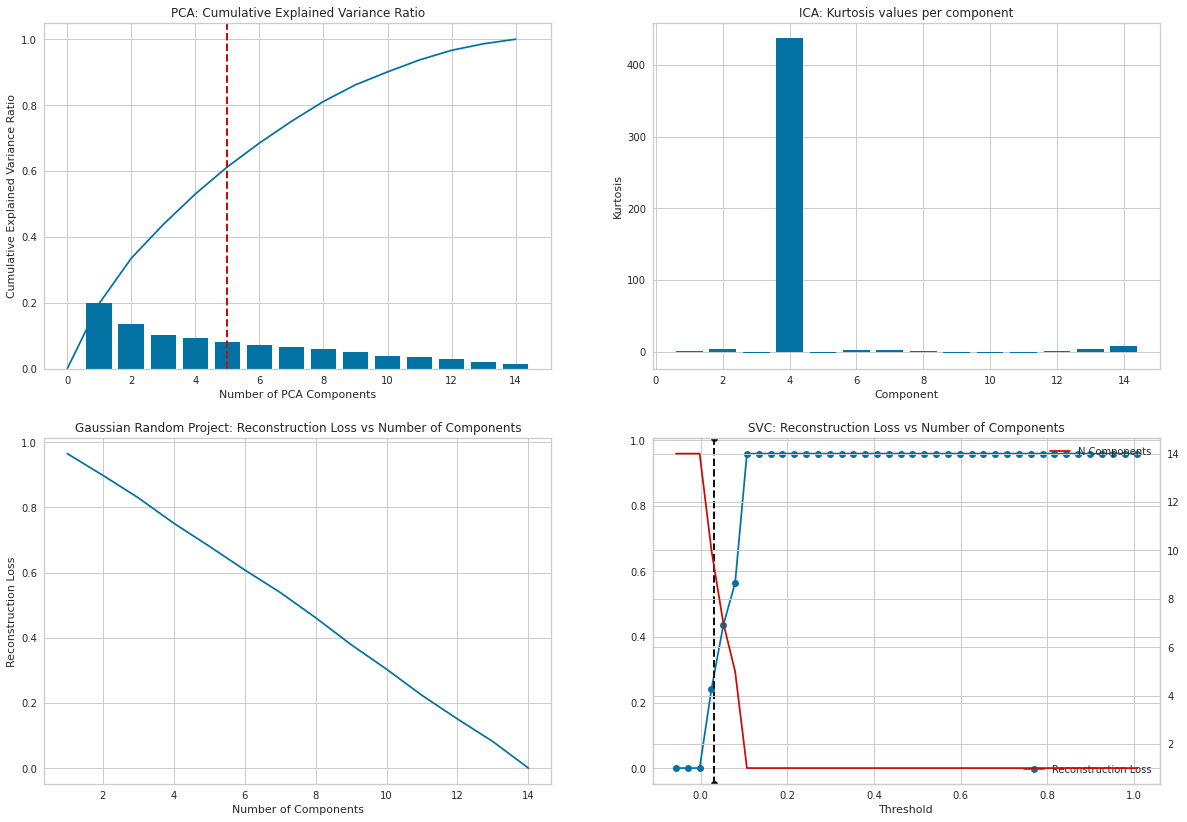

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


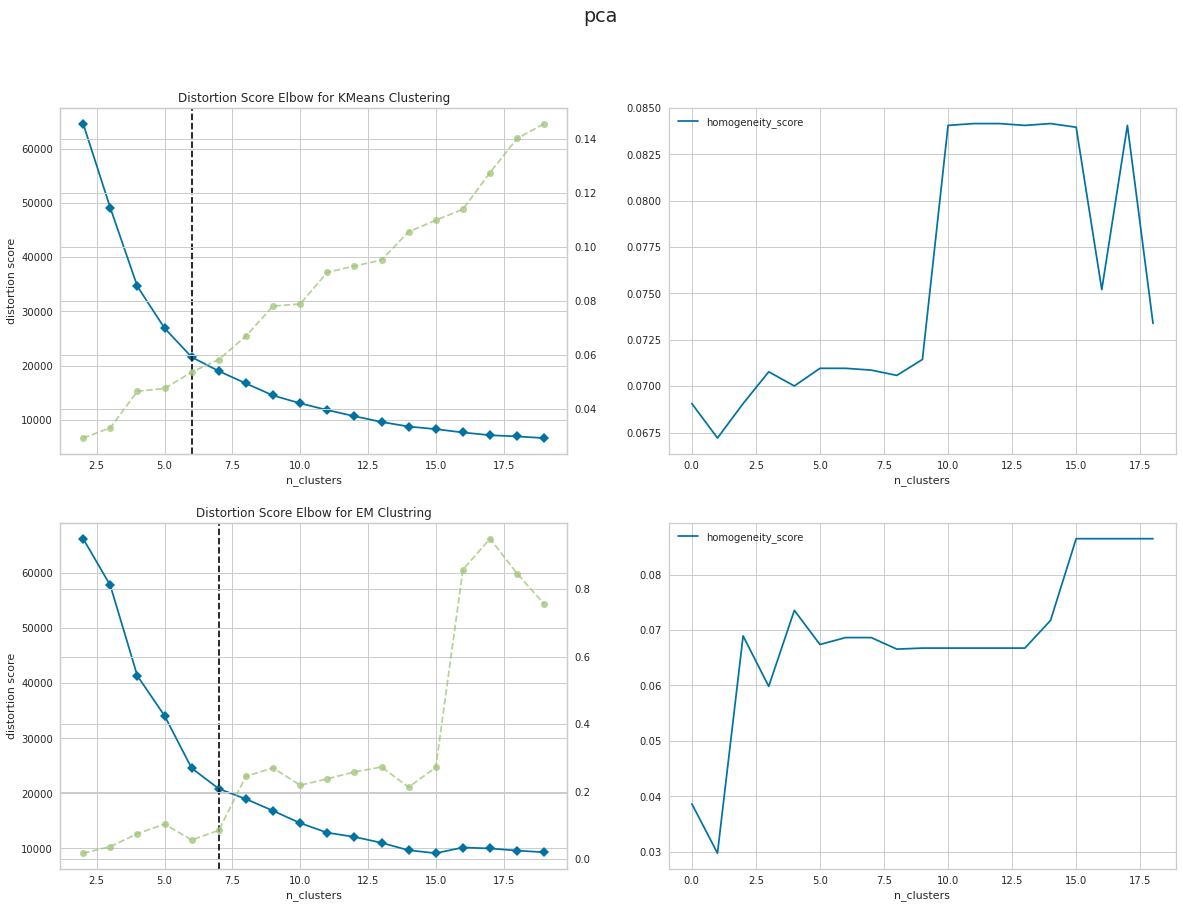

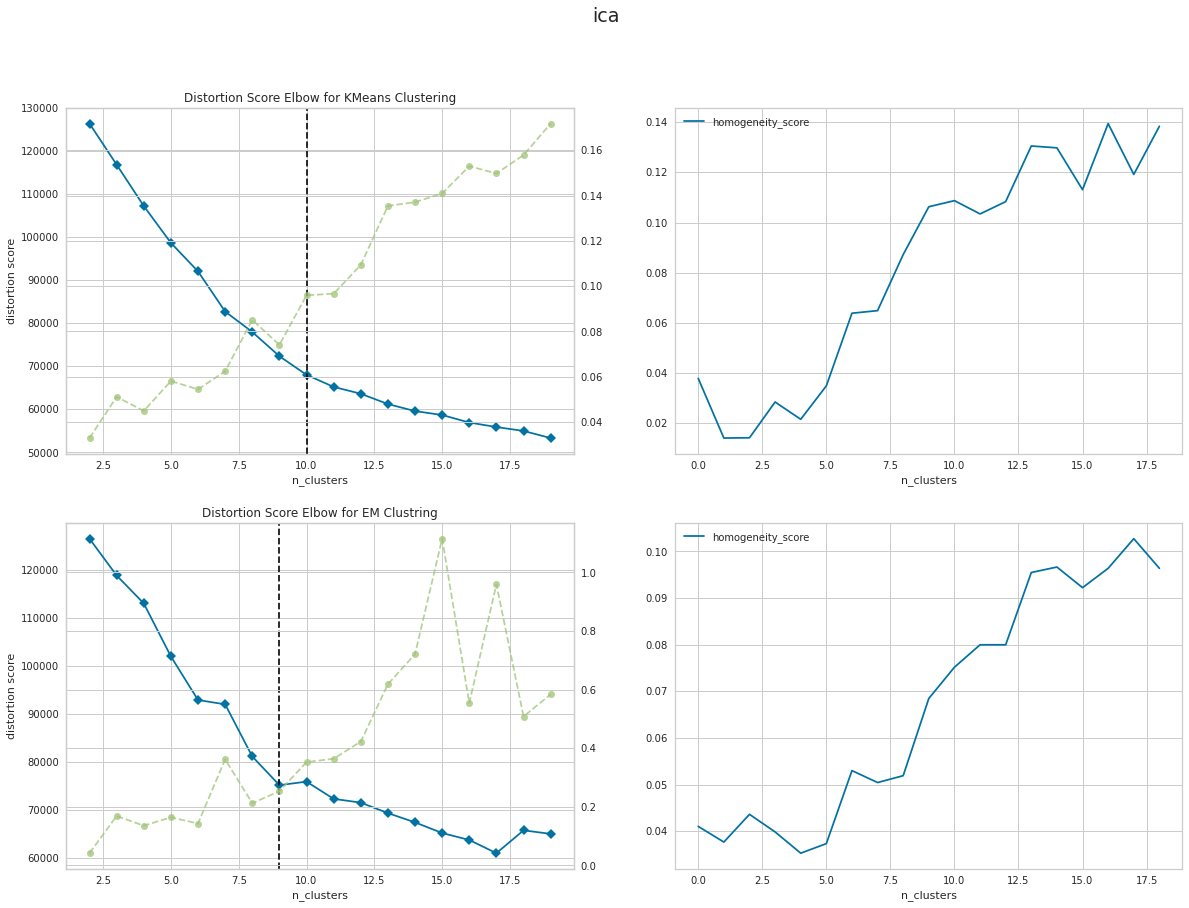

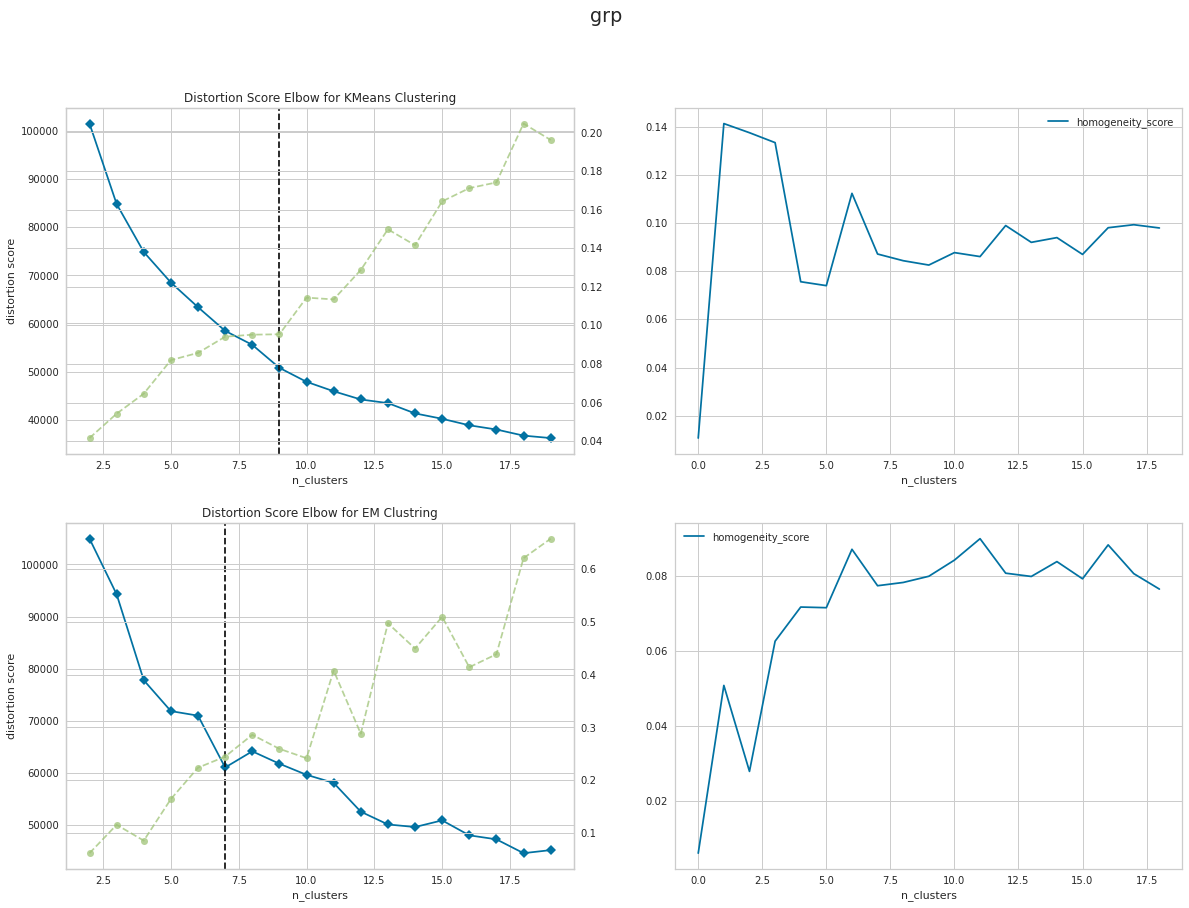

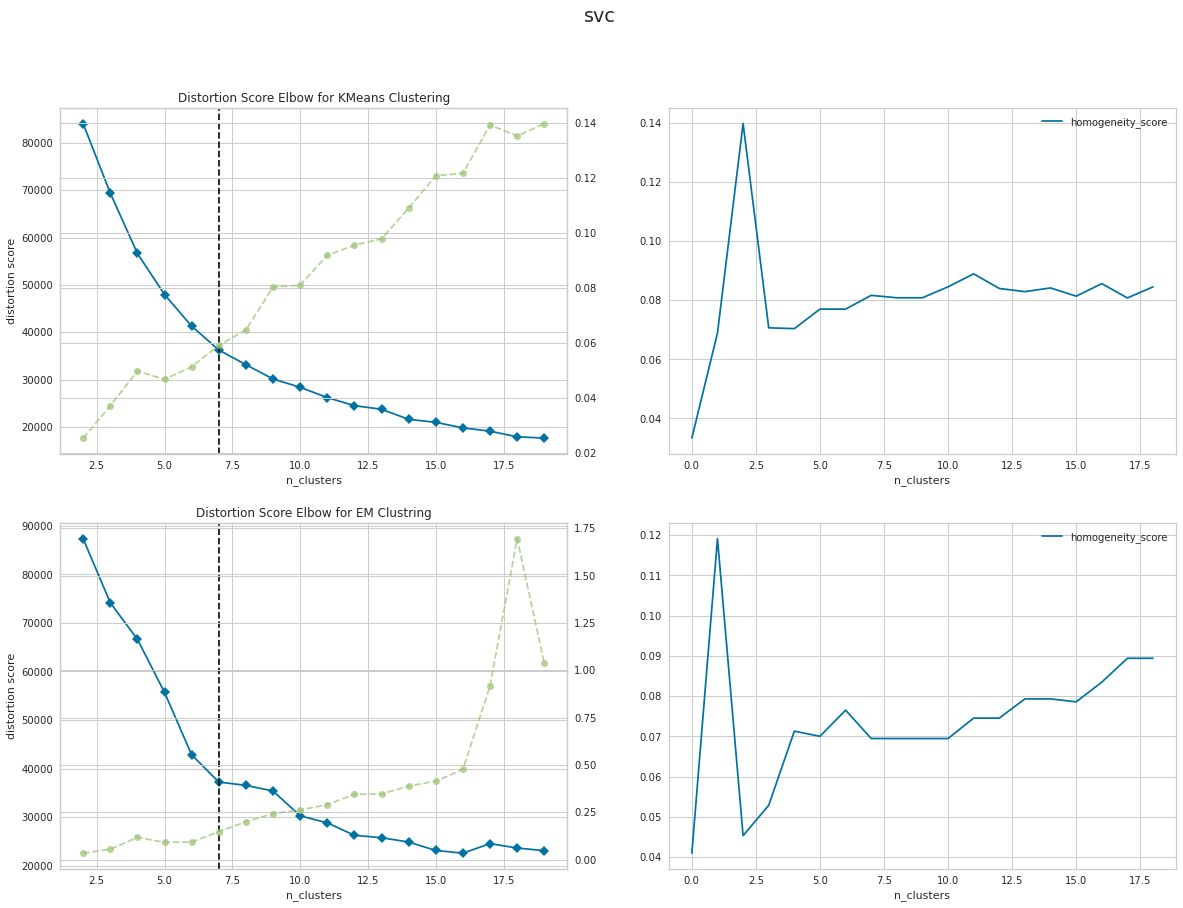

In [4]:
for i in range(3):
    experiment.run_step(i, render=True)